# This file contains the analysis of the dataset, its processing of model training, and a comparison of their accuracy results.

## Question: Bank Marketing Analysis
Attached is a txt file containing some real data that relates to a marketing campaign run by
a bank. The aim of the marketing campaign was to get customers to subscribe to a bank
term deposit product. Whether they did this or not is variable ‘y’ in the data set.

The bank in question is considering how to optimise this campaign in future.

**What would your recommendations to the marketing manager be?**

## Variable description
The variables are as follows:

Input variables: 1 - age (numeric) 2 - job : type of job (categorical:
'admin.','unknown','unemployed','management','housemaid','entrepreneur','student',
'blue-collar','self-employed','retired','technician','services') 3 - marital : marital status
(categorical: 'married','divorced','single'; note: 'divorced' means divorced or widowed) 4 -
education (categorical: 'unknown','secondary','primary','tertiary') 5 - default: has credit in
default? (binary: 'yes','no') 6 - balance: average yearly balance, in euros (numeric) 7 -
housing: has housing loan? (binary: 'yes','no') 8 - loan: has personal loan? (binary:
'yes','no') ### related with the last contact of the current campaign: 9 - contact: contact
communication type (categorical: 'unknown','telephone','cellular') 10 - day: last contact
day of the month (numeric) 11 - month: last contact month of year (categorical: 'jan', 'feb',
'mar', ..., 'nov', 'dec') 12 - duration: last contact duration, in seconds (numeric) #### other
attributes: 13 - campaign: number of contacts performed during this campaign and for this
client (numeric, includes last contact) 14 - pdays: number of days that passed by after the
client was last contacted from a previous campaign (numeric, -1 means client was not
previously contacted) 15 - previous: number of contacts performed before this campaign
and for this client (numeric) 16 - poutcome: outcome of the previous marketing campaign
(categorical: 'unknown','other','failure','success')

Output variable (desired target): 17 - y - has the client subscribed a term deposit? (binary:
'yes','no')

Importing libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

Loading dataset

In [2]:
df = pd.read_csv('data.txt', sep='\t')

Checking the first five examples in the dataframe

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Checking the basic information about the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Check for missing values in the dataset

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing values, so let's look at the data distribution

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


There may be some anomalies in the balance, duration, campaign, and pdays columns. Let's check them out.

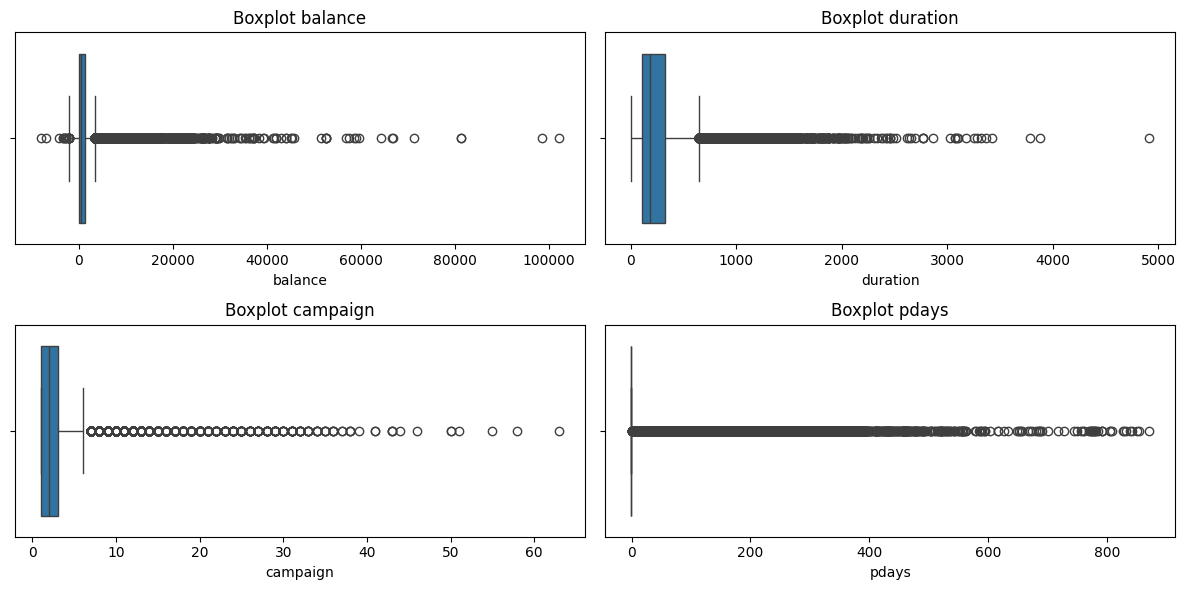

In [7]:
numerical_features = ['balance', 'duration', 'campaign', 'pdays']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [8]:
print("Number of clients with a negative balance:", (df['balance'] < 0).sum())
print("Number of records with zero call duration:", (df['duration'] == 0).sum())
print("Number of records from the campaign > 10:", (df['campaign'] > 10).sum())
print("Unique values of pdays:", df['pdays'].value_counts())

Number of clients with a negative balance: 3766
Number of records with zero call duration: 3
Number of records from the campaign > 10: 1196
Unique values of pdays: pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64


Here, it is better to remove examples with 0 in the duration column, as they most likely mean that the call was false. We will also create a separate binary feature was_contacted_before instead of pdays

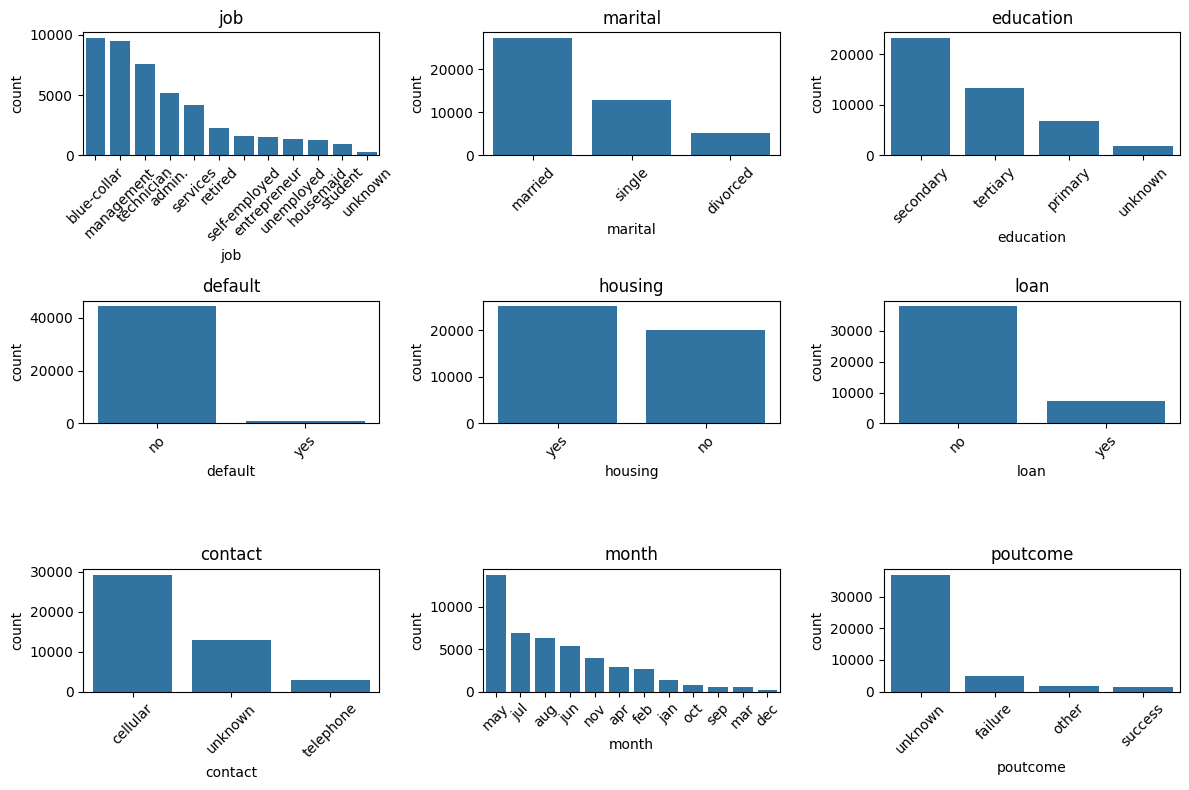

In [9]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(col)

plt.tight_layout()
plt.show()

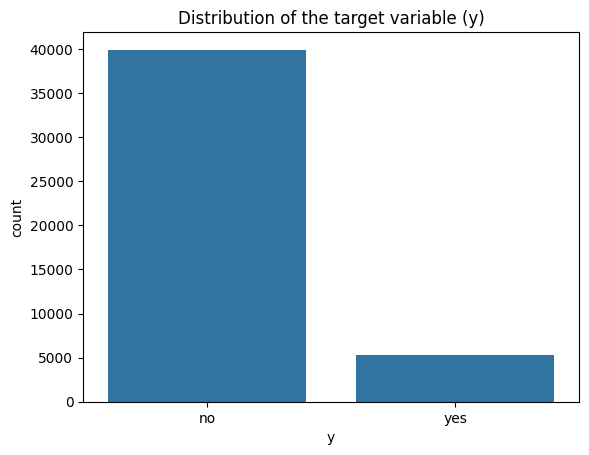

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [10]:
sns.countplot(x=df['y'])
plt.title('Distribution of the target variable (y)')
plt.show()

print(df['y'].value_counts(normalize=True) * 100)

Our data is very unbalanced. In this case, we can try several approaches: 
- oversampling/undersampling
- consider class weights in the model
- Change the quality metric: it is better to use F1-score, precision, recall, or AUC-ROC

Let's start processing the data.

First, let's process abnormal values. How we handle them was mentioned above.

In [11]:
df_processed = df[df['duration'] != 0]
df_processed = df_processed.copy()
df_processed.loc[:, 'was_contacted_before'] = (df_processed['pdays'] != -1).astype(int)
df_processed = df_processed.drop(columns=['pdays'])

In [12]:
df_processed.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,was_contacted_before
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no,0


Now let's convert categorical variables to One-Hot Encoding format.

In [13]:
df_processed['y'] = df_processed['y'].map({'no': 0, 'yes': 1})

In [14]:
df_encoded = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include=['bool']).columns})

In [15]:
df_encoded.head()

,age,balance,day,duration,campaign,previous,y,was_contacted_before,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [16]:
df_encoded.describe()

,age,balance,day,duration,campaign,previous,y,was_contacted_before,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
count,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,...,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000
mean,40.936294,1362.228676,15.806052,258.180211,2.763560,0.580362,0.116993,0.182645,0.215272,0.032870,...,0.152517,0.118143,0.010551,0.304459,0.087816,0.016325,0.012807,0.040701,0.033423,0.817466
std,10.618823,3044.794660,8.322417,257.527769,3.097582,2.303513,0.321415,0.386379,0.411015,0.178299,...,0.359526,0.322781,0.102177,0.460183,0.283031,0.126722,0.112444,0.197598,0.179741,0.386288
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see, each feature has now been converted to a number, which is necessary for model training.

Now we check the correlation of the features

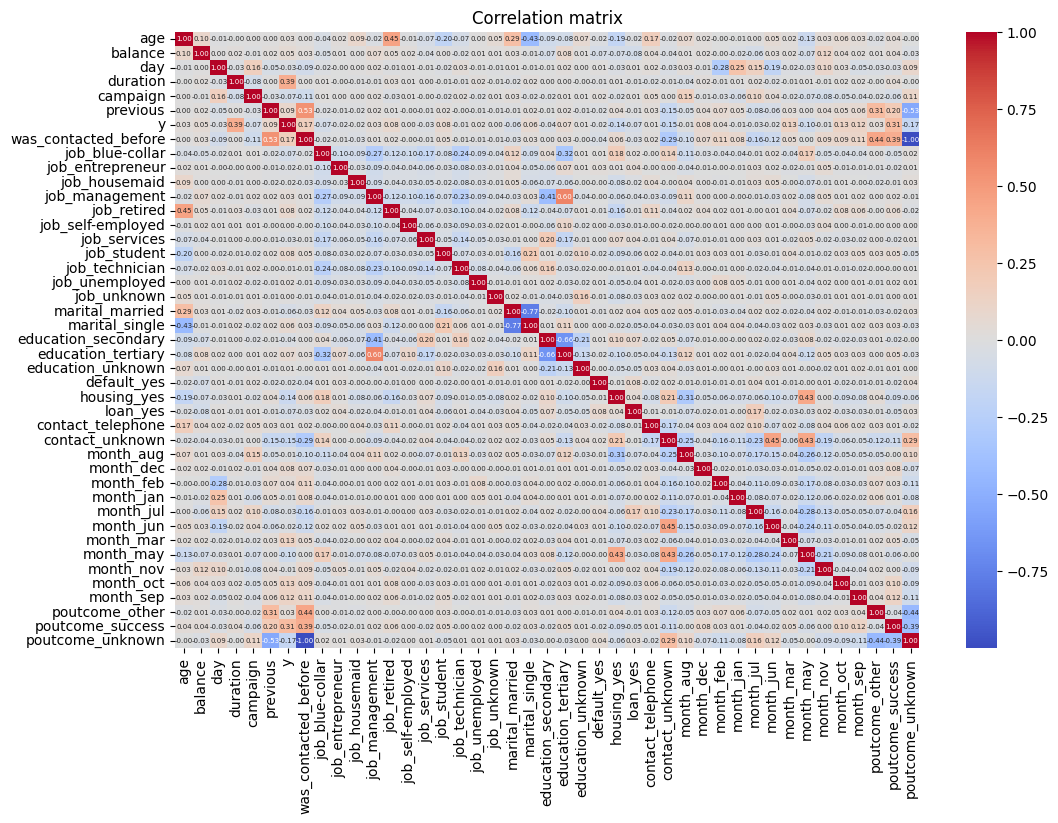

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 5})
plt.title("Correlation matrix")
plt.show()

Judging by the analysis of feature correlations, we have multicollinear features: poutcome_unknown and was_contacted_before. Therefore, we will simply remove one of them

In [18]:
df_encoded.corr()["y"].sort_values(ascending=False)

y                       1.000000
duration                0.394512
poutcome_success        0.306785
was_contacted_before    0.167254
month_mar               0.129454
month_oct               0.128529
month_sep               0.123183
previous                0.093230
job_retired             0.079240
job_student             0.076894
month_dec               0.075163
education_tertiary      0.066434
marital_single          0.063512
balance                 0.052845
month_feb               0.038411
job_management          0.032928
poutcome_other          0.031950
age                     0.025153
job_unemployed          0.020386
contact_telephone       0.014036
education_unknown       0.012048
job_self-employed       0.000850
job_unknown             0.000265
month_aug              -0.008523
month_jan              -0.008787
job_technician         -0.008960
month_nov              -0.014945
job_housemaid          -0.015199
month_jun              -0.016814
job_entrepreneur       -0.019628
default_ye

Looking at the correlation of the features with the dependent variable, we can see that two features are the most correlated:
- duration = 0.394512
- poutcome_success = 0.306785

**Which leads to the conclusion that these two variables are the most influential on the target variable**

Let's remove multicollinearity

In [19]:
df_encoded = df_encoded.drop(columns=['poutcome_unknown'])

In [20]:
df_encoded.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous', 'y',
       'was_contacted_before', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success'],
      dtype='object')

Let's move on to the stage of splitting the dataset and normalize the values

In [21]:
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((36166, 41), (9042, 41), (36166,), (9042,))

So now we have 41 features and 36166 examples in the training dataset, and 9042 examples in the test dataset.

Standardizing data

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's move on to choosing the models we will compare:
- RandomForestClassifier
- LogisticRegression
- Support Vector Machine
- Neural Network

We will start with a random forest

In [24]:
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

Let's check the accuracy of predictions by the quality metrics Precision, Recall, F1 score

In [25]:
y_pred = rf_model.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7984
           1       0.65      0.39      0.49      1058

    accuracy                           0.90      9042
   macro avg       0.79      0.68      0.72      9042
weighted avg       0.89      0.90      0.89      9042



Due to the unbalanced data, it is clear that the model predicts answer 1, i.e. “Yes”, very poorly. Let's look at the results of other models.

Logistic Regression without "balanced" class weights

In [27]:
lr_model = LogisticRegression(random_state=42).fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7984
           1       0.66      0.34      0.45      1058

    accuracy                           0.90      9042
   macro avg       0.79      0.66      0.70      9042
weighted avg       0.89      0.90      0.89      9042



Logistic Regression with "balanced" class weights

In [28]:
lr_model = LogisticRegression(random_state=42, class_weight='balanced').fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7984
           1       0.42      0.81      0.56      1058

    accuracy                           0.85      9042
   macro avg       0.70      0.83      0.73      9042
weighted avg       0.91      0.85      0.87      9042



Judging by the F1 score, the accuracy has slightly increased with the addition of the balance parameter, but this is still a very low result

SVM with RBF kernel without "balanced" class weights

In [29]:
svc_model = SVC(random_state=42).fit(X_train_scaled, y_train)

y_pred = svc_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7984
           1       0.66      0.32      0.43      1058

    accuracy                           0.90      9042
   macro avg       0.79      0.65      0.69      9042
weighted avg       0.89      0.90      0.89      9042



SVM with RBF kernel with "balanced" class weights

In [30]:
svc_model = SVC(random_state=42, class_weight='balanced').fit(X_train_scaled, y_train)

y_pred = svc_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7984
           1       0.42      0.84      0.56      1058

    accuracy                           0.85      9042
   macro avg       0.70      0.85      0.74      9042
weighted avg       0.91      0.85      0.87      9042



Trained models: RF, LR, SVM have roughly similar accuracy, but each suffers from imbalanced data

Let's try the latest model - Neural Network

In [31]:
dnn_model = Sequential()
dnn_model.add(Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)))
dnn_model.add(Dense(64, activation="relu"))
dnn_model.add(Dense(1, activation="sigmoid"))

In [32]:
dnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [33]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5376      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________


In [34]:
dnn_model_history = dnn_model.fit(X_train_scaled, y_train, batch_size=32, epochs=20, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/20
1131/1131 [==============================] - 7s 4ms/step - loss: 0.2331 - accuracy: 0.8990 - val_loss: 0.2176 - val_accuracy: 0.9032
Epoch 2/20
1131/1131 [==============================] - 5s 5ms/step - loss: 0.2072 - accuracy: 0.9070 - val_loss: 0.2130 - val_accuracy: 0.9064
Epoch 3/20
1131/1131 [==============================] - 5s 4ms/step - loss: 0.1999 - accuracy: 0.9101 - val_loss: 0.2088 - val_accuracy: 0.9063
Epoch 4/20
1131/1131 [==============================] - 5s 4ms/step - loss: 0.1939 - accuracy: 0.9107 - val_loss: 0.2127 - val_accuracy: 0.9041
Epoch 5/20
1131/1131 [==============================] - 4s 4ms/step - loss: 0.1902 - accuracy: 0.9133 - val_loss: 0.2127 - val_accuracy: 0.9060
Epoch 6/20
1131/1131 [==============================] - 4s 4ms/step - loss: 0.1862 - accuracy: 0.9158 - val_loss: 0.2104 - val_accuracy: 0.9025
Epoch 7/20
1131/1131 [==============================] - 4s 4ms/step - loss: 0.1828 - accuracy: 0.9171 - val_loss: 0.2153 - val_accuracy:

We can see that the accuracy of the validation data does not change - the model has been overfitted. Let's add a dropout.

In [35]:
dnn_model = Sequential()
dnn_model.add(Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)))
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(64, activation="relu"))
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(1, activation="sigmoid"))

In [36]:
dnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [37]:
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               5376      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________


In [38]:
dnn_model_history = dnn_model.fit(X_train_scaled, y_train, batch_size=32, epochs=20, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/20
1131/1131 [==============================] - 5s 4ms/step - loss: 0.2408 - accuracy: 0.8976 - val_loss: 0.2177 - val_accuracy: 0.9044
Epoch 2/20
1131/1131 [==============================] - 5s 5ms/step - loss: 0.2173 - accuracy: 0.9026 - val_loss: 0.2170 - val_accuracy: 0.9052
Epoch 3/20
1131/1131 [==============================] - 5s 5ms/step - loss: 0.2106 - accuracy: 0.9058 - val_loss: 0.2102 - val_accuracy: 0.9042
Epoch 4/20
1131/1131 [==============================] - 5s 5ms/step - loss: 0.2072 - accuracy: 0.9067 - val_loss: 0.2092 - val_accuracy: 0.9074
Epoch 5/20
1131/1131 [==============================] - 5s 5ms/step - loss: 0.2018 - accuracy: 0.9087 - val_loss: 0.2078 - val_accuracy: 0.9059
Epoch 6/20
1131/1131 [==============================] - 5s 5ms/step - loss: 0.2001 - accuracy: 0.9088 - val_loss: 0.2078 - val_accuracy: 0.9042
Epoch 7/20
1131/1131 [==============================] - 5s 5ms/step - loss: 0.1973 - accuracy: 0.9103 - val_loss: 0.2070 - val_accuracy:

In [39]:
y_pred = (dnn_model.predict(X_test_scaled) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

283/283 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7984
           1       0.64      0.48      0.55      1058

    accuracy                           0.91      9042
   macro avg       0.79      0.72      0.75      9042
weighted avg       0.90      0.91      0.90      9042



Even a deep neural network did not show better results with unbalanced data. Let's try options for eliminating class imbalance

Let's try to combine Undersampling and SMOTE methods

In [40]:
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(y_train_resampled.value_counts())

E:\Programs\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


y
0    31935
1    15967
Name: count, dtype: int64


In [41]:
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

print(y_train_resampled.value_counts())

y
0    15967
1    15967
Name: count, dtype: int64


E:\Programs\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
E:\Programs\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
E:\Programs\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Let's try training our models again on balanced data

In [42]:
rf_model = RandomForestClassifier(random_state=42).fit(X_train_resampled, y_train_resampled)

y_pred = rf_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      7984
           1       0.51      0.73      0.60      1058

    accuracy                           0.89      9042
   macro avg       0.73      0.82      0.77      9042
weighted avg       0.91      0.89      0.89      9042



In [43]:
lr_model = LogisticRegression(random_state=42).fit(X_train_resampled, y_train_resampled)

y_pred = lr_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7984
           1       0.42      0.82      0.56      1058

    accuracy                           0.85      9042
   macro avg       0.70      0.84      0.73      9042
weighted avg       0.91      0.85      0.87      9042



In [44]:
svc_model = SVC(random_state=42).fit(X_train_resampled, y_train_resampled)

y_pred = svc_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7984
           1       0.42      0.83      0.56      1058

    accuracy                           0.85      9042
   macro avg       0.70      0.84      0.73      9042
weighted avg       0.91      0.85      0.87      9042



In [45]:
dnn_model = Sequential()
dnn_model.add(Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)))
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(64, activation="relu"))
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(1, activation="sigmoid"))

dnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

dnn_model_history = dnn_model.fit(X_train_resampled, y_train_resampled, batch_size=32, epochs=20, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/20
998/998 [==============================] - 5s 5ms/step - loss: 0.3754 - accuracy: 0.8389 - val_loss: 0.3523 - val_accuracy: 0.8165
Epoch 2/20
998/998 [==============================] - 4s 4ms/step - loss: 0.3173 - accuracy: 0.8697 - val_loss: 0.3238 - val_accuracy: 0.8290
Epoch 3/20
998/998 [==============================] - 5s 5ms/step - loss: 0.3028 - accuracy: 0.8769 - val_loss: 0.3307 - val_accuracy: 0.8338
Epoch 4/20
998/998 [==============================] - 4s 4ms/step - loss: 0.2909 - accuracy: 0.8826 - val_loss: 0.3113 - val_accuracy: 0.8379
Epoch 5/20
998/998 [==============================] - 4s 4ms/step - loss: 0.2848 - accuracy: 0.8850 - val_loss: 0.3095 - val_accuracy: 0.8472
Epoch 6/20
998/998 [==============================] - 4s 4ms/step - loss: 0.2768 - accuracy: 0.8894 - val_loss: 0.3279 - val_accuracy: 0.8409
Epoch 7/20
998/998 [==============================] - 4s 4ms/step - loss: 0.2697 - accuracy: 0.8930 - val_loss: 0.3333 - val_accuracy: 0.8390
Epoch 

In [46]:
y_pred = (dnn_model.predict(X_test_scaled) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

283/283 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7984
           1       0.43      0.85      0.57      1058

    accuracy                           0.85      9042
   macro avg       0.70      0.85      0.74      9042
weighted avg       0.91      0.85      0.87      9042



Judging by the F1 score, the random forest model showed the best accuracy (0.60). Let's move on to optimizing the hyperparameters of this model

In [47]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

print("The best parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
The best parameters:  {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}


In [48]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7984
           1       0.53      0.69      0.60      1058

    accuracy                           0.89      9042
   macro avg       0.74      0.80      0.77      9042
weighted avg       0.91      0.89      0.90      9042



Let's try to identify the most important features for the best model

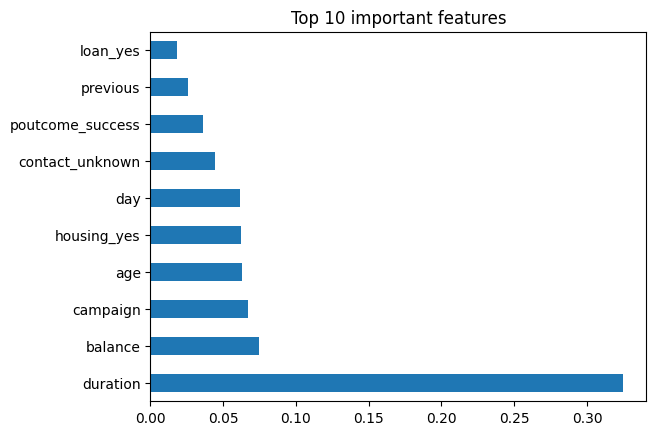

In [49]:
feature_importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 important features')
plt.show()

It turned out that the most important feature that has the strongest impact on the model's prediction is **duration**

### As a result, we got the best model with an accuracy of 60% in predicting that a customer will agree to subscribe.

During the data analysis process, attention was paid to the distribution of the data, possible anomalies, and the presence of missing values.

In the process of data processing, anomalous values were eliminated, categorical variables were converted to One-Hot Encoding format, the pdays column was replaced with was_contacted_before and converted to a binary variable. After some processing of the dataset, we were able to look at the correlation of the variables, and it turned out that the poutcome_unknown and was_contacted_before variables have a strong negative correlation (100%), which leads to multicollinearity. After analyzing the correlations of the variables, it was decided to discard the poutcome_unknown variable. We also analyzed the correlation of the features with the target variable, which showed the two most influential variables on the target variable:  duration and poutcome_success. After these steps, we divided the dataset into training and test samples and standardized the data.

In the process of training the models, all models had approximately similar prediction accuracy and were trained on unbalanced data (45%).

### In the process of improving the model's accuracy, we tried:
- Use of different types of models: **Random Forest Classifier, Logistic Regression, SVM, Deep Neural Network**.
- Data balancing (**Undersampling, Oversampling**)
- Optimization of hyperparameters

### Methods that helped:
- Selecting the best model for predictions (**Random Forest Classifier**)
- Data balancing (accuracy improved **from 49% to 60%**)

**Hyperparameter optimization** did not improve model performance

### Advice for a marketing manager:
- We advise you to keep the duration of the conversation with the customer longer, as this feature has the greatest impact on the customer's decision.
- Pay attention to the customer's balance, because if it is low, they are likely to refuse the bank's services.